# Hybrid sorting
### David Rackerby

### Hypothesis
To sort an array, Merge sort and Insertion sort have worst case time-complexities of $O(N log N)$ and $O(N^2)$ respectively. It's expected that for larger input sizes, Merge sort will outperform Insertion sort. However, the overhead associated with Merge sort's recursion and memory-allocation will likely cause Insertion sort to outperform it on smaller input sizes. To get the best of both worlds, we–in practice–employ hybrid sorting algorithms that takes advantage of the strengths of multiple sorting algorithms. The main strength of Tim sort, a hybrid sorting algorithm that combines Merge sort and Insertion sort, chooses when to use Insertion sort depending on the size of the input in relation to a hyperparameter $k$. We hypothesize that the value of $k$ that optimizes for speed will be 65, since this was the input size that Insertion sort outperformed Merge sort until.

### Methods
This report has two main experiments:
1. We will use a pseudo-random number generator to generate arrays of random elements sorting various sizes of them with Tim sort. Additionally, we will vary the value of $k$ and find how performance changes with both parameters. Arrays from sizes 0 to 1,000 will be sorted, values of $k$ 0 to 100 will be used.

2. Once the optimal value for $k$ has been empirically derived we will use it as the chosen parameter to compare Tim sort to Merge and Insertion sort on another set of elements. The version of Python used is Python 3.11.2. The version of Matplotlib used is 3.7.1. The pseudo-random number generator used is the Mersenne Twister, which is Python's default generator. The notebook used to produce this report can be found at https://github.com/rikipls/CSE-431-HW-5

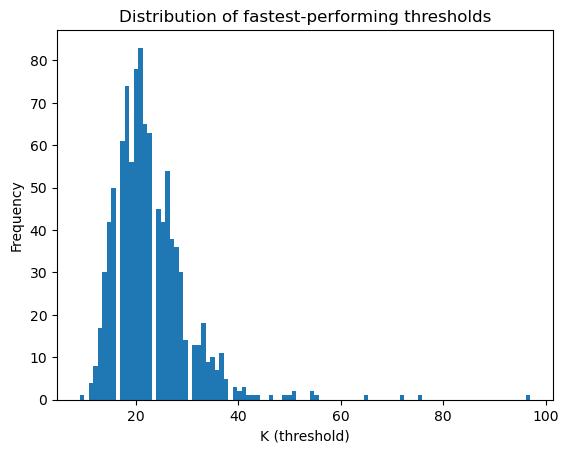

In [11]:
import matplotlib.pyplot as plt
import numpy as np

import random
from typing import List
import time

def tim_sort(data: List[int], k: int) -> None:
    N = len(data)
    if N <= 1:
        return
    if N <= k:
        insertion_sort(data)
    else:
        middle = N // 2
        left = data[:middle]
        right = data[middle:] 
        
        tim_sort(left, k)
        tim_sort(right, k)
        
        left_index = right_index = 0
        while left_index + right_index < N:
            if left_index < len(left) and \
                    (right_index >= len(right) or left[left_index] <= right[right_index]):
                data[left_index + right_index] = left[left_index]
                left_index += 1
            else:
                data[left_index + right_index] = right[right_index]
                right_index += 1

def merge_sort(data: List[int]) -> None:
    N = len(data)
    if N <= 1:
        return
    
    middle = N // 2
    left = data[:middle]
    right = data[middle:]
    
    merge_sort(left)
    merge_sort(right)
    
    left_index = right_index = 0
    while left_index + right_index < N:
        if left_index < len(left) and \
                (right_index >= len(right) or left[left_index] <= right[right_index]):
            data[left_index + right_index] = left[left_index]
            left_index += 1
        else:
            data[left_index + right_index] = right[right_index]
            right_index += 1

def insertion_sort(data: List[int]) -> None:
    for i in range(1, len(data)):
        curr_element = data[i]
        
        j = i - 1
        while j >= 0 and curr_element <= data[j]:
            data[j + 1] = data[j]
            j -= 1
        data[j + 1] = curr_element
        

random.seed(431)
NUM_ELEMENTS = 1000

population = [random.randint(0, NUM_ELEMENTS) for _ in range(NUM_ELEMENTS)]

K_BOUND = 100

# tim_sort_highest_ks[i] is the value of K where, when sorting an array of i elements, performed the fastest
tim_sort_fastest_ks = [0] * NUM_ELEMENTS

for i in range(NUM_ELEMENTS):
    sample = random.choices(population, k=i)

    time_by_k = [0] * K_BOUND
    for j in range(K_BOUND):
        copy = sample[:]
        start_tim = time.monotonic_ns()
        tim_sort(data=copy, k=j)
        end_tim = time.monotonic_ns()

        # Convert to microseconds
        time_by_k[j] = 0.001 * (end_tim - start_tim)
    # The "fastest" threshold is the one with the fastest performance on a given input size
    tim_sort_fastest_ks[i] = np.argmin(time_by_k)
    
plt.hist(tim_sort_fastest_ks, bins=100)
plt.xlabel("K (threshold)")
plt.ylabel("Frequency")
plt.title("Distribution of fastest-performing thresholds")
plt.show()

In [12]:
from collections import Counter
counter = Counter(tim_sort_fastest_ks)
counter.most_common(1)

[(21, 83)]

The value of K that performs best on the most input sizes is $K = 21$. We will use this value to compare Tim sort against Merge sort and Insertion sort.

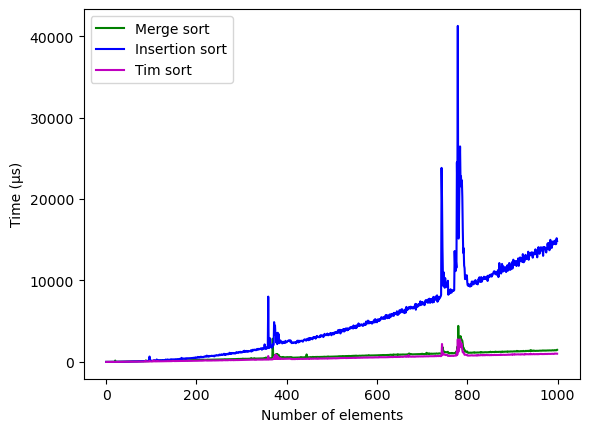

In [17]:
population = [random.randint(0, NUM_ELEMENTS) for _ in range(NUM_ELEMENTS)]
merge_sort_times = [0] * NUM_ELEMENTS
insertion_sort_times = [0] * NUM_ELEMENTS
tim_sort_times = [0] * NUM_ELEMENTS

THRESHOLD = counter.most_common(1)[0][0]

for i in range(NUM_ELEMENTS):
    sample = random.choices(population, k=i)
    merge_copy = sample[:]
    insertion_copy = sample[:]
    tim_copy = sample[:]

    # Merge sort
    start_merge = time.monotonic_ns()
    merge_sort(data=merge_copy)
    end_merge = time.monotonic_ns()
    # Convert to microseconds
    merge_sort_times[i] = 0.001 * (end_merge - start_merge)

    # Insertion sort
    start_insertion = time.monotonic_ns()
    insertion_sort(data=insertion_copy)
    end_insertion = time.monotonic_ns()
    insertion_sort_times[i] = 0.001 * (end_insertion - start_insertion) 
    
    # Tim sort
    start_tim = time.monotonic_ns()
    tim_sort(data=tim_copy, k=THRESHOLD)
    end_tim = time.monotonic_ns()
    tim_sort_times[i] = 0.001 * (end_tim - start_tim) 

plt.plot(merge_sort_times, 'g', label="Merge sort")
plt.plot(insertion_sort_times, 'b', label="Insertion sort")
plt.plot(tim_sort_times, 'm', label="Tim sort")
plt.xlabel("Number of elements")
plt.ylabel("Time (μs)")
plt.legend()
plt.show()

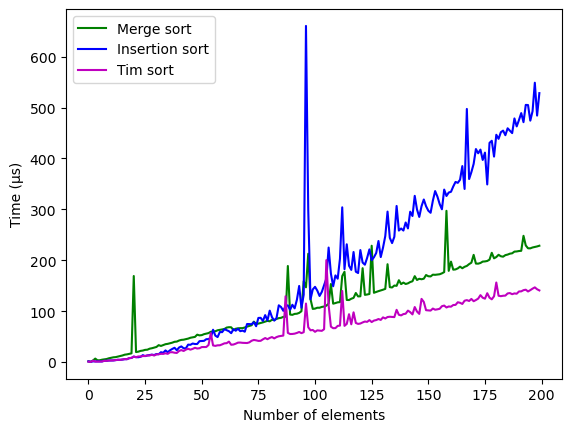

In [18]:
plt.plot(merge_sort_times[:200], 'g', label="Merge sort")
plt.plot(insertion_sort_times[:200], 'b', label="Insertion sort")
plt.plot(tim_sort_times[:200], 'm', label="Tim sort")
plt.xlabel("Number of elements")
plt.ylabel("Time (μs)")
plt.legend()
plt.show()

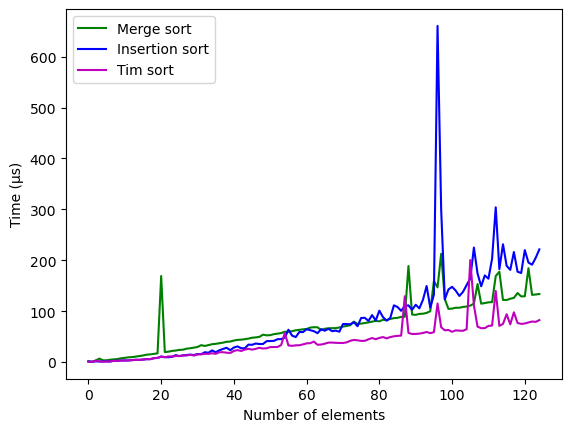

In [19]:
plt.plot(merge_sort_times[:125], 'g', label="Merge sort")
plt.plot(insertion_sort_times[:125], 'b', label="Insertion sort")
plt.plot(tim_sort_times[:125], 'm', label="Tim sort")
plt.xlabel("Number of elements")
plt.ylabel("Time (μs)")
plt.legend()
plt.show()

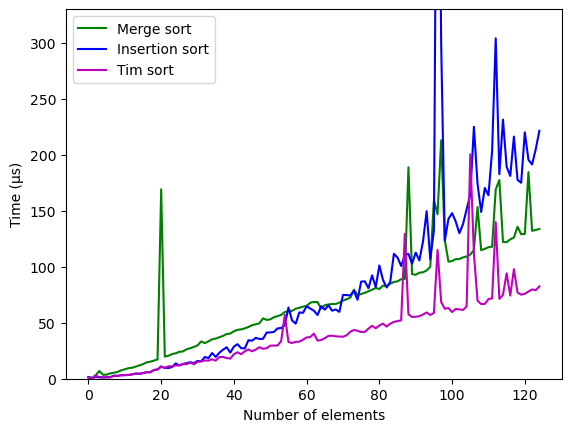

In [20]:
plt.plot(merge_sort_times[:125], 'g', label="Merge sort")
plt.plot(insertion_sort_times[:125], 'b', label="Insertion sort")
plt.plot(tim_sort_times[:125], 'm', label="Tim sort")
plt.xlabel("Number of elements")
plt.ylabel("Time (μs)")

maxtime = max([max(merge_sort_times[:125]), max(insertion_sort_times[:125]), max(tim_sort_times[:125])])
y_limit = maxtime // 2
plt.ylim([0, y_limit])

plt.legend()
plt.show()

### Results
In all runs of Tim sort, the same data was sorted. The optimal value for $K$ was empirically derived by collecting the $K$ value that performed best on each input size and finding which value was the most performant choice the greatest number of times. Once that value was determined, it was used to compare Tim sort against Merge sort and Insertion sort on another set of random data. As done in Question 1, we focus on the parts of the figure where the biggest performance overlaps occur.

### Discussion
Contrary to the hypothesis, the value of $K$ that's empirically optimal for Tim sort is smaller than the crossover point from Question 1. This may be because this $K$ is where the **greatest relative increase in performance** from choosing Insertion sort over Merge sort is exhibited. Hence, it would appear most frequently as the value that performs the best when compared to calling Insertion sort more/less frequently. Tim sort, expectedly, outperforms both Merge sort and Insertion sort on virtually every input size, with a better constant factor than Merge sort when $N$ grows large.

### Conclusions
The empirically optimal value of $K$ is 21. At this value, Tim sort performs better than Merge sort and Insertion sort on virtually all inputs.